In [95]:
import pandas as pd
import numpy as np

In [96]:
#A cleaned version Brazil MST data (only for 2005)
data = pd.read_stata('C:/Users/MKINA18/Desktop/Advanced Data Analysis for Social Sciences/Datasets/Brazil MST data 2005.dta')
data.columns

Index(['ibgecode', 'state', 'latitude', 'longitude', 'invasions_count',
       'reforms_count', 'invasions_count_cum', 'invasions_dum', 'log_income',
       'ln_agriculturalproductivity', 'codigo', 'PT_voteshare',
       'infantmortality', 'BF_coverage1000', 'log_invasions_count_cum',
       'log_intended_lands1995'],
      dtype='object')

### Installation of Geopandas

In [3]:
#pip install geopandas

If you get trouble while installing geopandas, follow the conda way. Please follow the conda section in the following link: https://geopandas.org/en/stable/getting_started/install.html

Summary, run following codes in anaconda prompt, give your permission if asked:

1. conda install --channel conda-forge geopandas

2. conda create -n geo_env

3. conda activate geo_env

4. conda config --env --add channels conda-forge

5. conda config --env --set channel_priority strict

6. conda install python=3 geopandas


Then, activate geo_env in the anaconda prompt, and call "jupyter notebook" in that environment. Then you are using your notebook in a separate place. Note that, python might ask you to install some packages again, you are in a new zone.

In [97]:
import geopandas

### Read, merge, and plot

In [88]:
import geopandas as gpd

shapefile = gpd.read_file("BR/BRMUE250GC_SIR.shp")
print(shapefile)

       ibgecode                                           geometry
0     1501956.0  POLYGON ((-46.31955 -1.75518, -46.31990 -1.755...
1     2111250.0  POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...
2     5201454.0  POLYGON ((-51.14230 -18.29672, -51.14236 -18.2...
3     5202353.0  POLYGON ((-51.69953 -16.23270, -51.69957 -16.2...
4     1502855.0  POLYGON ((-55.17193 -1.83331, -55.16647 -1.731...
...         ...                                                ...
5567  3535507.0  POLYGON ((-50.69420 -22.39885, -50.69410 -22.3...
5568  5200209.0  POLYGON ((-48.86197 -17.98972, -48.86111 -17.9...
5569  4316808.0  POLYGON ((-52.46848 -29.70647, -52.46847 -29.7...
5570  4217303.0  POLYGON ((-53.10221 -26.93414, -53.10236 -26.9...
5571  2611705.0  POLYGON ((-35.94368 -8.06130, -35.93697 -8.047...

[5572 rows x 2 columns]


<Axes: >

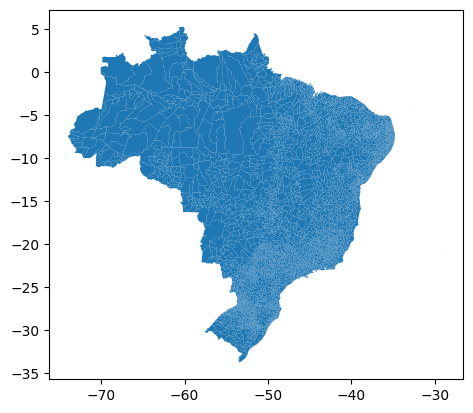

In [89]:
shapefile.plot()
#we don't have any varaible yet, only ibgecode and geometry

In [90]:
#Let's merge them
merged_data = shapefile.merge(data, on='ibgecode')

In [8]:
area = shapefile.geometry.area
ibgecode = shapefile.ibgecode
ibgecode = pd.Series(ibgecode)
area = pd.Series(area)
area.to_csv('area.csv')
ibgecode.to_csv('ibgecode.csv')

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_39280\1001226091.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area = shapefile.geometry.area


<Axes: >

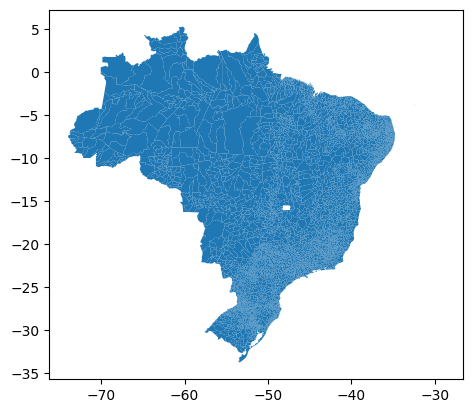

In [9]:
merged_data.plot()

In [10]:
merged_data.boundary

0       LINESTRING (-46.31955 -1.75518, -46.31990 -1.7...
1       LINESTRING (-44.63409 -5.03498, -44.63407 -5.0...
2       LINESTRING (-51.14230 -18.29672, -51.14236 -18...
3       LINESTRING (-51.69953 -16.23270, -51.69957 -16...
4       LINESTRING (-55.17193 -1.83331, -55.16647 -1.7...
                              ...                        
5564    LINESTRING (-50.69420 -22.39885, -50.69410 -22...
5565    LINESTRING (-48.86197 -17.98972, -48.86111 -17...
5566    LINESTRING (-52.46848 -29.70647, -52.46847 -29...
5567    LINESTRING (-53.10221 -26.93414, -53.10236 -26...
5568    LINESTRING (-35.94368 -8.06130, -35.93697 -8.0...
Length: 5569, dtype: geometry

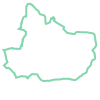

In [11]:
merged_data.boundary[15]

In [12]:
merged_data.centroid

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_39280\2756585028.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data.centroid


0        POINT (-46.44321 -1.98867)
1        POINT (-44.56830 -5.03994)
2       POINT (-51.26305 -18.21684)
3       POINT (-51.58454 -16.35347)
4        POINT (-55.11349 -1.84574)
                   ...             
5564    POINT (-50.62658 -22.45910)
5565    POINT (-48.79173 -18.07799)
5566    POINT (-52.40724 -29.64664)
5567    POINT (-53.04001 -26.89721)
5568     POINT (-35.88290 -8.08195)
Length: 5569, dtype: geometry

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_39280\2319410433.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data.centroid[15]


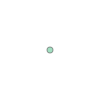

In [13]:
merged_data.centroid[15]

In [14]:
merged_data.head()

,ibgecode,geometry,state,latitude,longitude,invasions_count,reforms_count,invasions_count_cum,invasions_dum,log_income,ln_agriculturalproductivity,codigo,PT_voteshare,infantmortality,BF_coverage1000,log_invasions_count_cum,log_intended_lands1995
0,1501956.0,"POLYGON ((-46.31955 -1.75518, -46.31990 -1.755...",PA,-1.671,-46.529,0.0,0.0,0.0,0.0,4.506675,4.504200,150195,0.119788,21.645021,27.220774,0.0,NaN
1,2111250.0,"POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...",MA,-5.051,-44.584,0.0,0.0,0.0,0.0,4.706598,3.465854,211125,0.003955,35.211269,130.616516,0.0,NaN
2,5201454.0,"POLYGON ((-51.14230 -18.29672, -51.14236 -18.2...",GO,-18.299,-51.145,0.0,0.0,0.0,0.0,5.960618,4.078234,520145,0.051343,23.809525,42.537590,0.0,11.873193
3,5202353.0,"POLYGON ((-51.69953 -16.23270, -51.69957 -16.2...",GO,-16.386,-51.560,0.0,0.0,0.0,0.0,5.767555,4.374174,520235,0.043040,25.000000,82.949310,0.0,12.026681
4,1502855.0,"POLYGON ((-55.17193 -1.83331, -55.16647 -1.731...",PA,-1.888,-55.117,0.0,2.0,0.0,0.0,4.744106,4.493294,150285,0.237709,26.819923,43.823082,0.0,NaN


In [15]:
# Check what kind of object merged_data is
type(merged_data)

geopandas.geodataframe.GeoDataFrame

In [16]:
# Check the type of the geometry attribute
type(merged_data.geometry)

geopandas.geoseries.GeoSeries

In [17]:
# Inspect the first rows of the geometry
merged_data.geometry.head()

0    POLYGON ((-46.31955 -1.75518, -46.31990 -1.755...
1    POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...
2    POLYGON ((-51.14230 -18.29672, -51.14236 -18.2...
3    POLYGON ((-51.69953 -16.23270, -51.69957 -16.2...
4    POLYGON ((-55.17193 -1.83331, -55.16647 -1.731...
Name: geometry, dtype: geometry

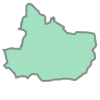

In [18]:
merged_data.geometry[15]

In [19]:
# Inspect the area of the municipalities
merged_data.geometry.area

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_39280\885109432.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data.geometry.area


0       0.196686
1       0.028806
2       0.051432
3       0.090886
4       0.116322
          ...   
5564    0.087868
5565    0.038651
5566    0.068333
5567    0.018694
5568    0.025759
Length: 5569, dtype: float64

In [20]:
merged_data.geometry.area[15]

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_39280\3537895533.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data.geometry.area[15]


0.005492539576120377

<Axes: >

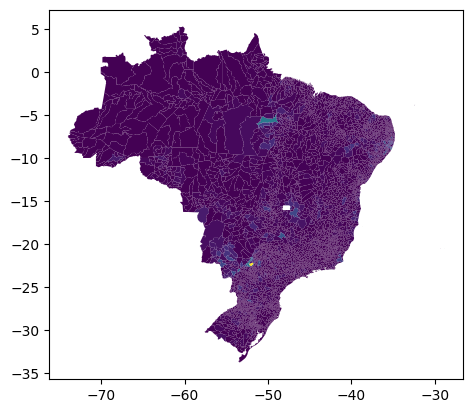

In [21]:
#Plot by invasion count
merged_data.plot(column='invasions_count_cum')

In [76]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
merged_data.plot(column='log_income', ax=ax, legend=True)

<Axes: title={'center': 'Land Invasions and Bolsa Familia in Brazil'}>

<Figure size 640x480 with 0 Axes>

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html

In [98]:
# pip install mapclassify

<Axes: >

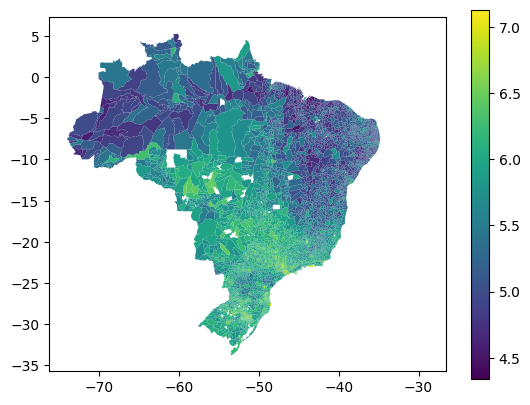

In [99]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
merged_data.plot(column='log_income', ax=ax, legend=True)

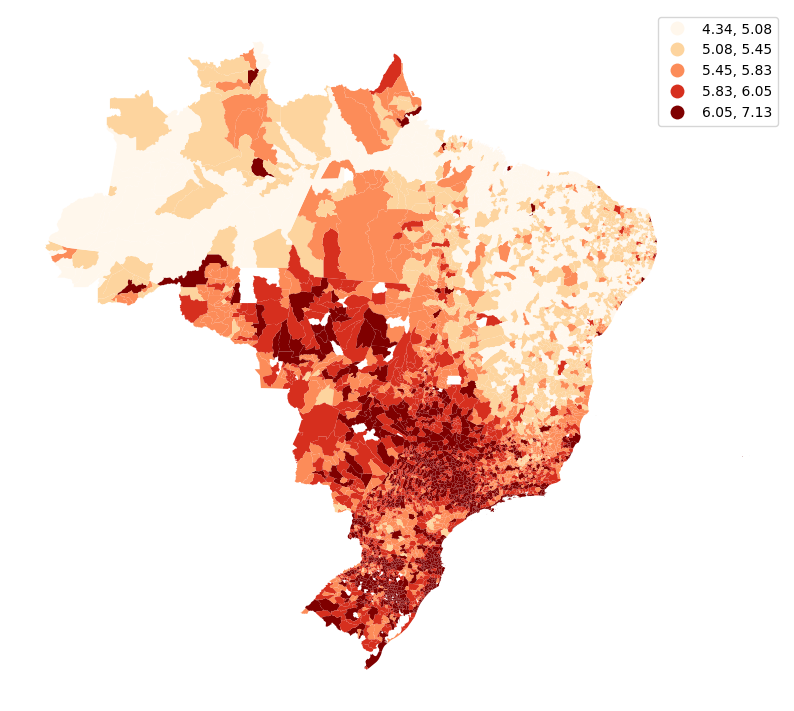

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='log_income', cmap='OrRd', scheme='quantiles', ax=ax, legend=True)
ax.set_axis_off()
plt.show()

<Axes: >

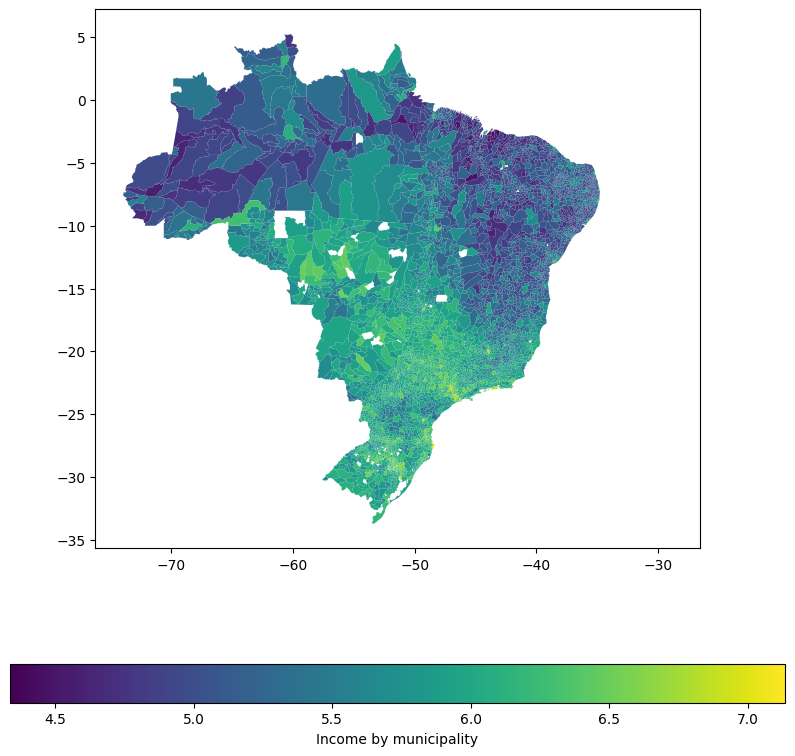

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='log_income', ax=ax, legend=True, 
                 legend_kwds={'label': "Income by municipality", 'orientation': "horizontal"})

<Axes: >

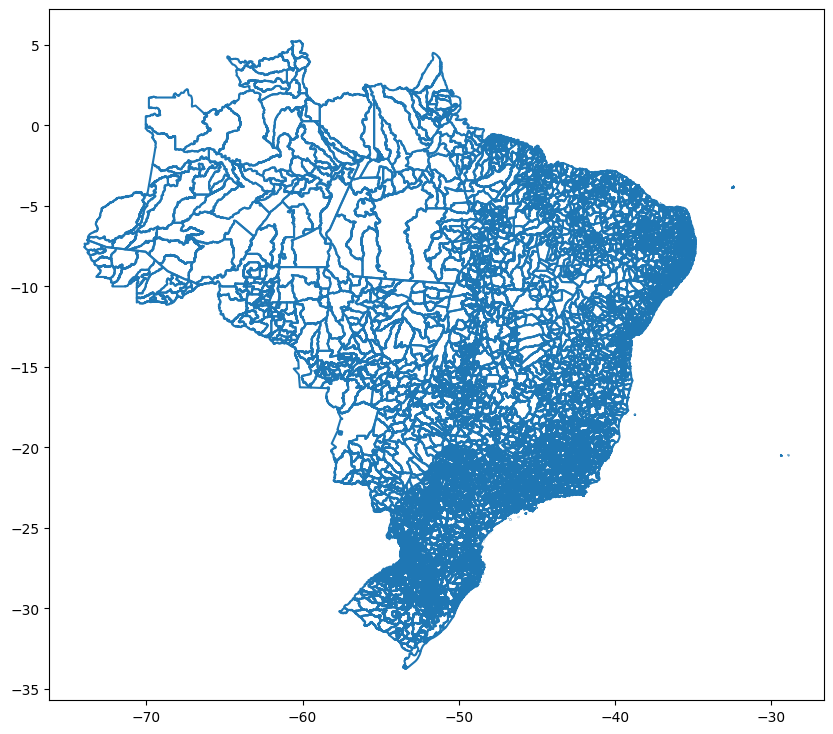

In [26]:
merged_data.boundary.plot(figsize=(10, 10))

In [27]:
invasions = merged_data[merged_data['invasions_count_cum'] >= 1]

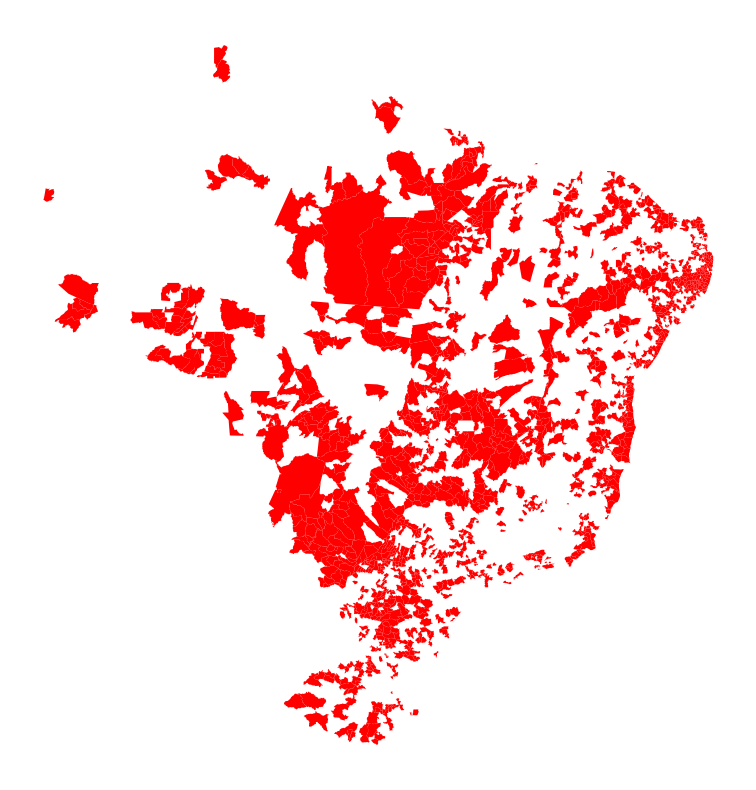

In [28]:
inv_plot = invasions.plot(marker='*', color='red', markersize=5, figsize=(10, 10))
inv_plot.set_axis_off()
plt.show()

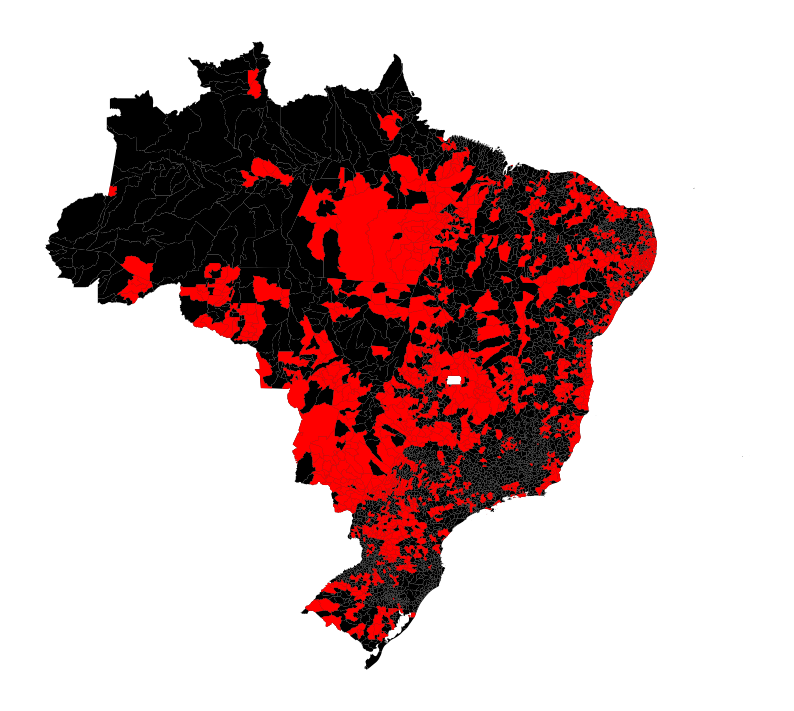

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(ax=ax, color='black')

invasions.plot(ax=ax, color='red')

ax.set_axis_off()
plt.show()

<Axes: >

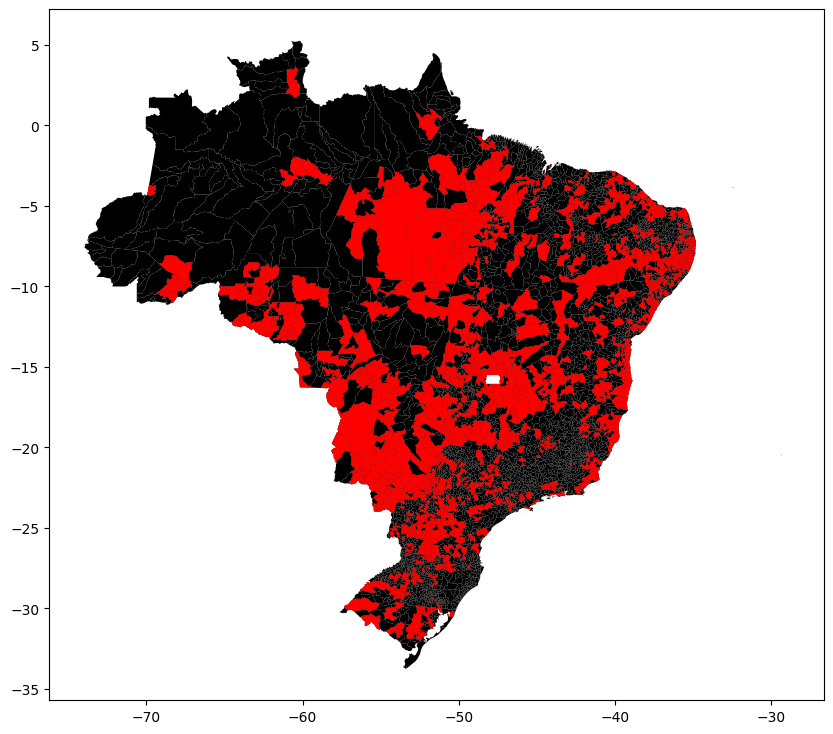

In [30]:
base = merged_data.plot(color='black', figsize=(10, 10))
invasions.plot(ax=base, color='red', markersize=5)

<Axes: >

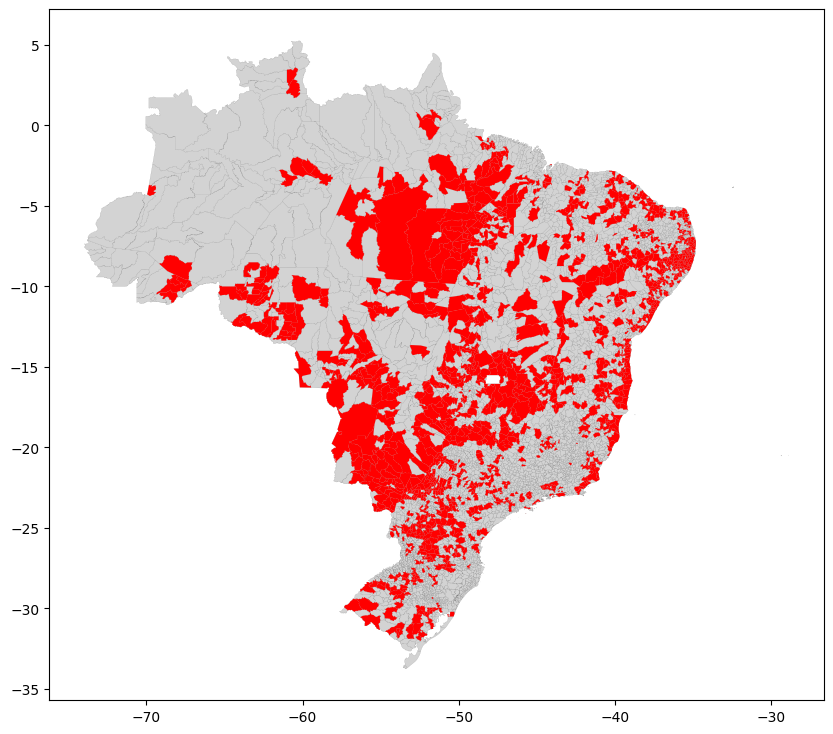

In [31]:
base = merged_data.plot(color='lightgray', edgecolor='grey', linewidth=0.1, figsize=(10, 10))
invasions.plot(ax=base, marker='o', color='red', markersize=5)

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_39280\1234106068.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data_points['geometry'] = merged_data_points['geometry'].centroid


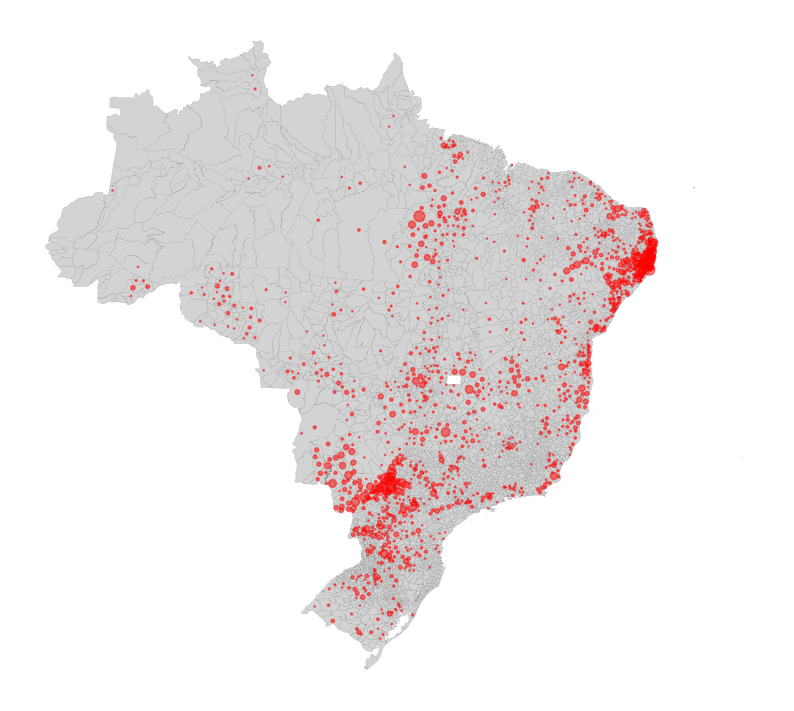

In [94]:
merged_data_points = merged_data.copy()
merged_data_points['geometry'] = merged_data_points['geometry'].centroid

fig, ax = plt.subplots(figsize=(10,10))

merged_data.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.1)

merged_data_points.plot(ax=ax, color="red", markersize="invasions_count_cum", 
                        scheme="quantiles", alpha=0.5, categorical=False, legend=True )
ax.set_axis_off()
plt.show()

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_39280\3434331099.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_data_points['geometry'] = merged_data_points['geometry'].centroid


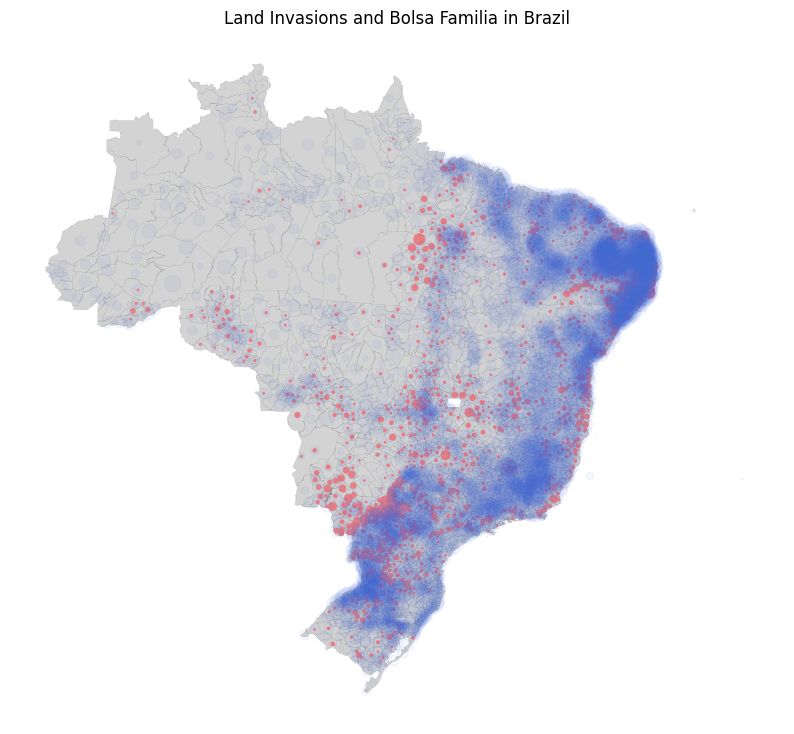

In [33]:
merged_data_points = merged_data.copy()
merged_data_points['geometry'] = merged_data_points['geometry'].centroid

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Land Invasions and Bolsa Familia in Brazil')

merged_data.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.1)

merged_data_points.plot(ax=ax, color="lightcoral", markersize="invasions_count_cum", 
                        scheme="quantiles", alpha=1, categorical=False)

merged_data_points.plot(ax=ax, color="royalblue", markersize="BF_coverage1000", 
                        scheme="quantiles", alpha=0.05, categorical=False)

ax.set_axis_off()
plt.show()
    

https://matplotlib.org/stable/gallery/color/named_colors.html

### Spatial weight matrix

In [34]:
#pip install pysal

1. conda install --channel conda-forge pysal

(skip second step if you created the geo_env above)

2. conda create -n geo_env

3. conda activate geo_env

4. conda config --env --add channels conda-forge

5. conda config --env --set channel_priority strict

6. conda install python=3 pysal

In [35]:
import pysal as ps

In [36]:
import libpysal

In [37]:
from libpysal.weights import Queen, Rook, KNN

Queen: More inclusive, catches any vertex

Rook: Considers edges

KNN: Equal number of neighbors for each, according to distances

In [38]:
w_knn1 = KNN.from_shapefile('BR/BRMUE250GC_SIR.shp')

C:\Users\MKINA18\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\cg\shapes.py:1394: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\MKINA18\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\cg\shapes.py:1123: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\MKINA18\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\cg\shapes.py:100: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\MKINA18\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
  warnings.warn(message)


In [39]:
type(w_knn1)

libpysal.weights.distance.KNN

In [40]:
len(w_knn1.neighbors)

5572

In [41]:
w_knn1.neighbors

{0: [1471, 2958],
 1: [3201, 1597],
 2: [1048, 4229],
 3: [4812, 4545],
 4: [3805, 500],
 5: [2538, 4824],
 6: [1198, 5415],
 7: [659, 4345],
 8: [2723, 3034],
 9: [449, 5231],
 10: [2754, 2980],
 11: [376, 1347],
 12: [4546, 3042],
 13: [3120, 5417],
 14: [5521, 4444],
 15: [3956, 3795],
 16: [4403, 1821],
 17: [4270, 4586],
 18: [2551, 886],
 19: [2460, 597],
 20: [3165, 5105],
 21: [1364, 4199],
 22: [3790, 2575],
 23: [4968, 3002],
 24: [4217, 3745],
 25: [5003, 5331],
 26: [4849, 33],
 27: [3593, 911],
 28: [2047, 1367],
 29: [1596, 3299],
 30: [2221, 3958],
 31: [2398, 1949],
 32: [3033, 2424],
 33: [3747, 4849],
 34: [2613, 2442],
 35: [1285, 4770],
 36: [1220, 5421],
 37: [2610, 506],
 38: [4591, 1753],
 39: [1748, 1936],
 40: [3836, 57],
 41: [3374, 1302],
 42: [1736, 2595],
 43: [5213, 277],
 44: [2506, 4593],
 45: [4137, 3224],
 46: [2804, 1826],
 47: [3152, 3789],
 48: [4640, 3033],
 49: [5078, 2320],
 50: [2131, 832],
 51: [4096, 4786],
 52: [5066, 1228],
 53: [4136, 433],

In [42]:
w_knn3 = KNN.from_shapefile('BR/BRMUE250GC_SIR.shp',3) #default was 2

In [43]:
w_knn3.neighbors

{0: [1471, 2958, 683],
 1: [3201, 1597, 832],
 2: [1048, 4229, 3629],
 3: [4812, 4545, 1070],
 4: [3805, 500, 804],
 5: [2538, 4824, 898],
 6: [1198, 5415, 3582],
 7: [659, 4345, 38],
 8: [2723, 3034, 5569],
 9: [449, 5231, 2195],
 10: [2754, 2980, 5201],
 11: [376, 1347, 5535],
 12: [4546, 3042, 1564],
 13: [3120, 5417, 3555],
 14: [5521, 4444, 4607],
 15: [3956, 3795, 4983],
 16: [4403, 1821, 1415],
 17: [4270, 4586, 3189],
 18: [2551, 886, 4067],
 19: [2460, 597, 1933],
 20: [3165, 5105, 2166],
 21: [1364, 4199, 5462],
 22: [3790, 2575, 3286],
 23: [4968, 3002, 212],
 24: [4217, 3745, 2699],
 25: [5003, 5331, 959],
 26: [4849, 33, 1767],
 27: [3593, 911, 3378],
 28: [2047, 1367, 2923],
 29: [1596, 3299, 4840],
 30: [2221, 3958, 4522],
 31: [2398, 1949, 201],
 32: [3033, 2424, 4033],
 33: [3747, 4849, 939],
 34: [2613, 2442, 1932],
 35: [1285, 4770, 155],
 36: [1220, 5421, 5102],
 37: [2610, 506, 5218],
 38: [4591, 1753, 659],
 39: [1748, 1936, 3891],
 40: [3836, 57, 4275],
 41: [337

In [44]:
w_queen = Queen.from_shapefile('BR/BRMUE250GC_SIR.shp')

C:\Users\MKINA18\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 3321, 4008.
  warnings.warn(message)


In [45]:
len(w_queen.neighbors)

5572

In [46]:
w_queen.neighbors

{0: [4527, 5514, 4204, 2958, 1471],
 1: [832, 3201, 5524, 692, 854, 5017, 1597],
 2: [1048, 3629, 4229, 1686],
 3: [4545, 4678, 4812, 1261, 1070, 1046, 2010, 5534],
 4: [2845, 804, 3805],
 5: [898, 2998, 4824, 2538, 3867],
 6: [2150, 5415, 3582, 1242, 4076, 1198],
 7: [659, 4261, 38, 4345, 1753],
 8: [4392, 5569, 3034, 2723],
 9: [449, 2195, 4980, 5320, 5482, 5231],
 10: [5201, 2754, 2980, 1797, 319],
 11: [1301, 3701, 376, 5337, 5535],
 12: [4546, 1051, 1564, 3042],
 13: [3555, 1575, 5480, 5417, 2988, 1584, 3120, 2898],
 14: [5521, 2271, 1477, 4444, 4607],
 15: [4983, 3956, 4599],
 16: [1415, 330, 5455, 3954, 4403, 4212, 468, 1821, 5565],
 17: [642, 3380, 3189, 4586, 4270],
 18: [1170, 4067, 886, 2551, 4269],
 19: [2460, 2436, 597, 5081, 444, 1933],
 20: [5105, 3165, 2166, 4456, 3947, 5389],
 21: [4199, 2668, 2508, 4749, 1364, 2934, 5462, 377, 1274],
 22: [3790, 3325, 3286, 2575],
 23: [212, 4968, 3002, 2348, 2509],
 24: [89, 3745, 4217, 2699],
 25: [2114, 5331, 164, 2036, 5003, 959],

In [47]:
w_rook = Rook.from_shapefile('BR/BRMUE250GC_SIR.shp')

In [48]:
len(w_rook.neighbors)

5572

In [49]:
w_rook.neighbors

{0: [4527, 5514, 4204, 2958, 1471],
 1: [832, 3201, 5524, 692, 854, 1597],
 2: [1048, 3629, 4229, 1686],
 3: [4545, 4678, 4812, 1261, 1070, 1046, 2010, 5534],
 4: [804, 2845],
 5: [898, 2998, 4824, 2538, 3867],
 6: [2150, 5415, 3582, 1242, 4076, 1198],
 7: [4345, 659, 4261, 38],
 8: [4392, 5569, 3034, 2723],
 9: [449, 2195, 4980, 5320, 5482, 5231],
 10: [5201, 2754, 2980, 1797, 319],
 11: [3701, 1301, 376, 5337, 5535],
 12: [4546, 1051, 1564, 3042],
 13: [3555, 1575, 5480, 5417, 2988, 1584, 3120, 2898],
 14: [5521, 2271, 1477, 4444, 4607],
 15: [4983, 3956, 4599],
 16: [1415, 330, 5455, 3954, 4403, 4212, 468, 1821, 5565],
 17: [642, 3380, 3189, 4586, 4270],
 18: [1170, 4067, 886, 2551, 4269],
 19: [2436, 597, 5081, 444, 2460, 1933],
 20: [5105, 2166, 4456, 5389, 3947, 3165],
 21: [4199, 2668, 2508, 4749, 1364, 2934, 5462, 377, 1274],
 22: [3790, 3325, 3286, 2575],
 23: [212, 4968, 3002, 2348, 2509],
 24: [89, 3745, 4217, 2699],
 25: [2114, 5331, 164, 2036, 5003, 959],
 26: [4849, 3236,

In [50]:
w_rook.neighbors[4]

[804, 2845]

In [51]:
w_queen.neighbors[4]

[2845, 804, 3805]

In [52]:
#We can call weight object directly from the dataframe
wq = libpysal.weights.Queen.from_dataframe(merged_data)
wq

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_39280\274911683.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = libpysal.weights.Queen.from_dataframe(merged_data)
C:\Users\MKINA18\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 3318, 4005.
  warnings.warn(message)


In [53]:
#We need to standardize our weights with respect to rows
wq.transform = 'r'

('WARNING: ', 3318, ' is an island (no neighbors)')
('WARNING: ', 4005, ' is an island (no neighbors)')


### Produce spatial lags

In [54]:
merged_data['invasions_count_splag'] = libpysal.weights.lag_spatial(wq, merged_data['invasions_count'])

In [55]:
merged_data['invasions_count_splag'],merged_data['invasions_count']

(0       0.000000
 1       0.000000
 2       0.250000
 3       0.000000
 4       0.000000
           ...   
 5564    0.142857
 5565    0.000000
 5566    0.000000
 5567    0.000000
 5568    0.600000
 Name: invasions_count_splag, Length: 5569, dtype: float64,
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 5564    4.0
 5565    0.0
 5566    0.0
 5567    0.0
 5568    1.0
 Name: invasions_count, Length: 5569, dtype: float64)

In [56]:
merged_data['invasions_count'].corr(merged_data['invasions_count_splag'])

0.24202801996457424

In [57]:
merged_data['BF_coverage1000_splag'] = libpysal.weights.lag_spatial(wq, merged_data['BF_coverage1000'])
merged_data['BF_coverage1000'].corr(merged_data['BF_coverage1000_splag'])

0.8144535864694518

***Spatial autocorrelation alert!!!***

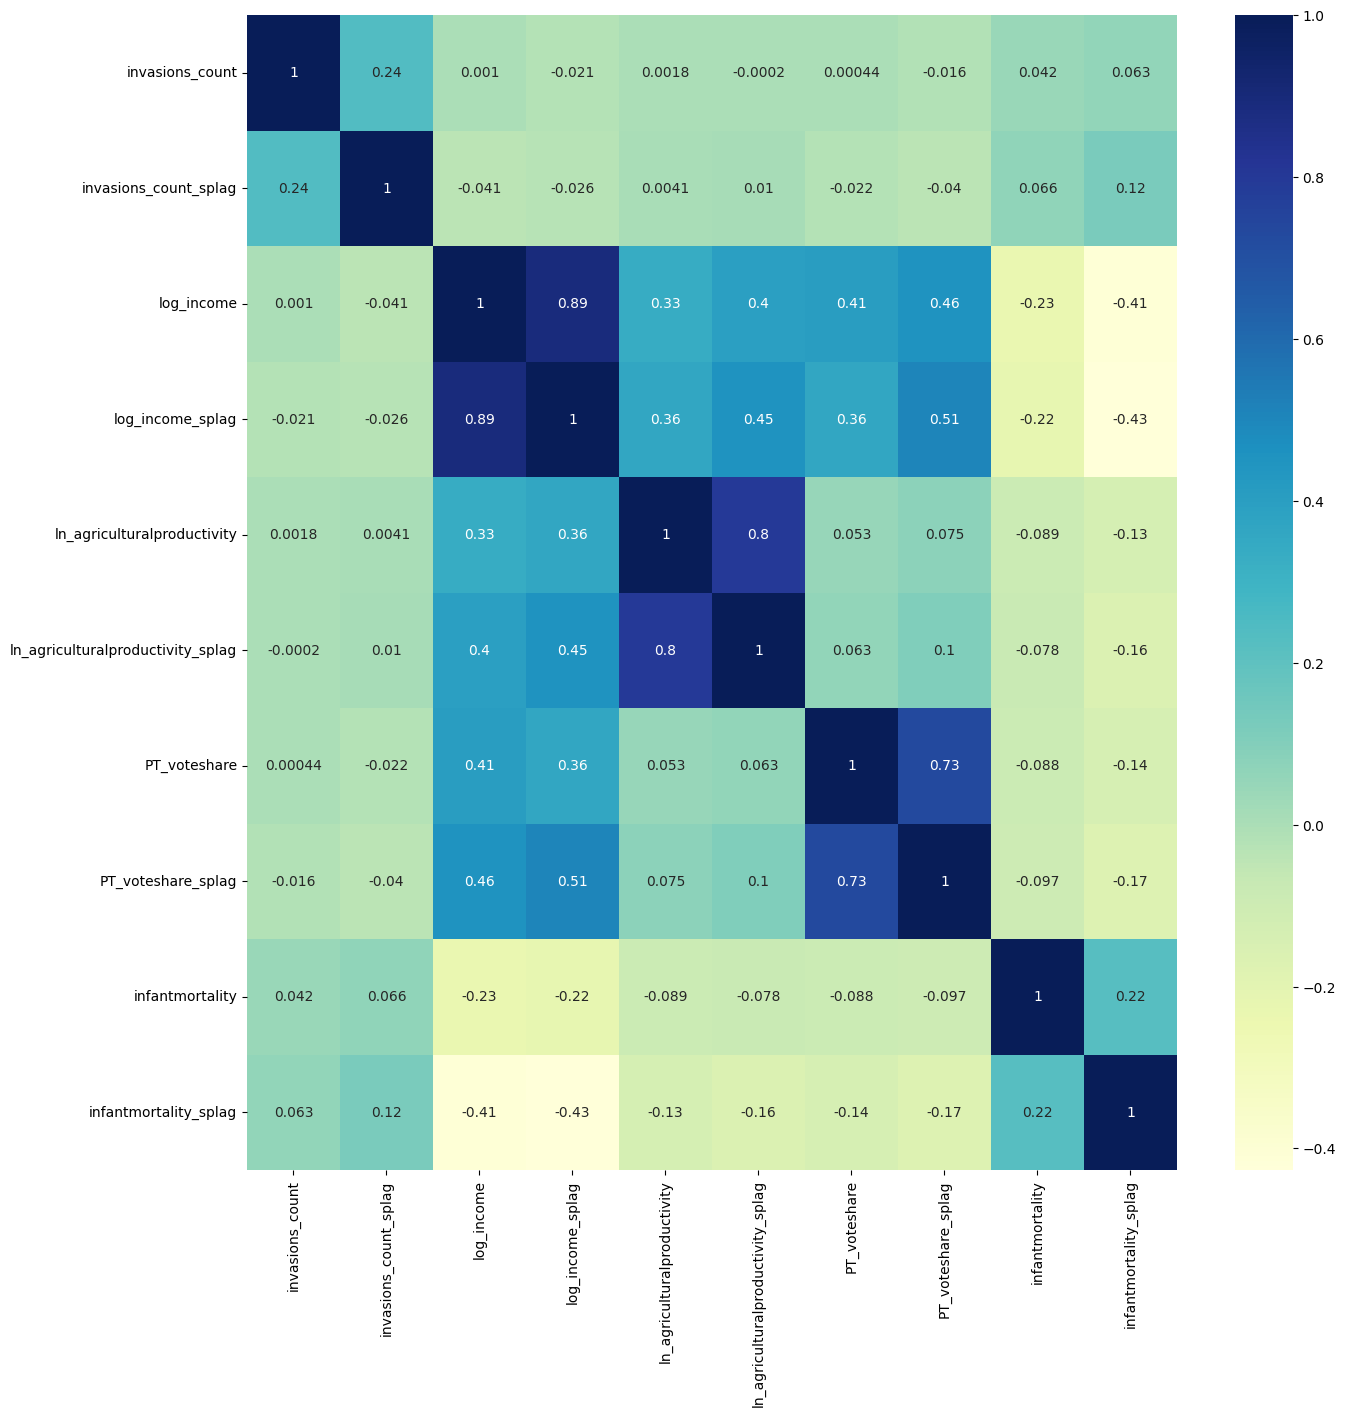

In [58]:
merged_data['log_income_splag'] = libpysal.weights.lag_spatial(wq, merged_data['log_income'])
merged_data['ln_agriculturalproductivity_splag'] = libpysal.weights.lag_spatial(wq, merged_data['ln_agriculturalproductivity'])
merged_data['PT_voteshare_splag'] = libpysal.weights.lag_spatial(wq, merged_data['PT_voteshare'])
merged_data['infantmortality_splag'] = libpysal.weights.lag_spatial(wq, merged_data['infantmortality'])

import seaborn as sns

fig = plt.subplots(figsize=(15, 15))
sns.heatmap(merged_data[['invasions_count', 'invasions_count_splag', 'log_income', 'log_income_splag', 
                        'ln_agriculturalproductivity','ln_agriculturalproductivity_splag', 'PT_voteshare',
                        'PT_voteshare_splag','infantmortality','infantmortality_splag']].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Run a Spatial regression

http://darribas.org/gds_scipy16/ipynb_md/08_spatial_regression.html

In [59]:
merged_data = merged_data.dropna(axis=0)

In [60]:
#pip install spreg

In [61]:
import spreg

In [62]:
#spreg only works with numpy arrays

In [63]:
y = merged_data['BF_coverage1000'].values

In [64]:
x_OLS = merged_data[['invasions_count_cum', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality']].values
x_OLS

array([[0.00000000e+00, 5.96061850e+00, 4.07823372e+00, 5.13432836e-02,
        2.38095245e+01],
       [0.00000000e+00, 5.76755524e+00, 4.37417364e+00, 4.30399380e-02,
        2.50000000e+01],
       [1.00000000e+00, 4.75354719e+00, 3.45397949e+00, 1.47119768e-02,
        2.23048325e+01],
       ...,
       [0.00000000e+00, 6.45536375e+00, 5.45690107e+00, 2.69398883e-01,
        1.55666256e+01],
       [0.00000000e+00, 6.08203602e+00, 4.16811943e+00, 3.81124193e-01,
        3.09278355e+01],
       [7.00000000e+00, 5.34594011e+00, 4.43830729e+00, 3.05718867e-02,
        1.36986303e+01]])

In [65]:
#We can redefine a weighting matrix, reading neighbors and weights
#from libpysal.weights import W
#w_matrix = W(wq.neighbors, wq.weights)

In [66]:
#We dropped some observations, then we need to recalculate the weights, to keep the total size consistent 
wq = libpysal.weights.Queen.from_dataframe(merged_data)
wq.transform = 'r'

C:\Users\MKINA18\AppData\Local\Temp\ipykernel_39280\890975600.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq = libpysal.weights.Queen.from_dataframe(merged_data)


('WARNING: ', 1688, ' is an island (no neighbors)')
('WARNING: ', 2251, ' is an island (no neighbors)')
('WARNING: ', 3194, ' is an island (no neighbors)')
('WARNING: ', 3692, ' is an island (no neighbors)')


C:\Users\MKINA18\AppData\Local\Programs\Python\Python311\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 4 islands with ids: 1688, 2251, 3194, 3692.
  warnings.warn(message)


### OLS with spreg

In [83]:
model_OLS = spreg.OLS(
    y,
    x_OLS,
    w=wq,
    spat_diag=True,
    name_x=['invasions_count_cum', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality'], 
    name_y='Bolsa Familia'
)

print(model_OLS.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Bolsa Familia                Number of Observations:        4555
Mean dependent var  :     70.9714                Number of Variables   :           6
S.D. dependent var  :     38.6515                Degrees of Freedom    :        4549
R-squared           :      0.5573
Adjusted R-squared  :      0.5568
Sum squared residual: 3.01207e+06                F-statistic           :   1145.1796
Sigma-square        :     662.139                Prob(F-statistic)     :           0
S.E. of regression  :      25.732                Log likelihood        :  -21253.708
Sigma-square ML     :     661.267                Akaike info criterion :   42519.416
S.E of regression ML:     25.7151                Schwarz criterion     :   42557.959

-----------------------------------------------------------

### Diagnostics for Spatial Dependence

| Test                         | DF | Value   | Prob   |
|------------------------------|----|---------|--------|
| **Lagrange Multiplier (lag)**    | 1  | 0.014   | 0.9056 |
| **Robust LM (lag)**              | 1  | 636.065 | 0.0000 |
| **Lagrange Multiplier (error)**  | 1  | 140.792 | 0.0000 |
| **Robust LM (error)**            | 1  | 776.843 | 0.0000 |
| **Lagrange Multiplier (SARMA)**  | 2  | 776.857 | 0.0000 |

These diagnostics assess spatial dependence in a dataset, commonly used in spatial econometrics or spatial s  The main summary from the diagnostics for spatial dependence is that there is clear evidence to reject the null of spatial randomness in the residuals, hence an explicitly spatial approach is warranted.tati#stics.

#### Lagrange Multiplier (lag)

- **DF (Degrees of Freedom):** 1
- **Value:** 0.014
- **Probability (Prob):** 0.9056

This test assesses spatial autocorrelation in the dependent variable. The low value (0.014) and high probability (0.9056) suggest weak evidence against the null hypothesis of no spatial autocorrelation. The result indicates that there may not be significant spatial dependence in the lagged values of #the variable.

#### Robust LM (lag)

- **DF (Degrees of Freedom):** 1
- **Value:** 636.065
- **Probability (Prob):** 0.0000

The robust Lagrange Multiplier test for spatial lag indicates a highly significant result (Probability: 0.0000), suggesting the presence of spatial autocorrelation in the lagged values. This result is robust to potential issues such #as heteroscedasticity.

#### Lagrange Multiplier (error)

- **DF (Degrees of Freedom):** 1
- **Value:** 140.792
- **Probability (Prob):** 0.0000

This test examines spatial autocorrelation in the error term. The high test value and low probability suggest rejecting the null hypothesis of no spatial autoc#orrelation in the error term.

#### Robust LM (error)

- **DF (Degrees of Freedom):** 1
- **Value:** 776.843
- **Probability (Prob):** 0.0000

The robust Lagrange Multiplier test for spatial error dependence is highly significant (Probability: 0.0000), indicating the likely presence of spa#tial autocorrelation in the error term.

#### Lagrange Multiplier (SARMA)

- **DF (Degrees of Freedom):** 2
- **Value:** 776.857
- **Probability (Prob):** 0.0000

This test examines spatial dependence using a spatial simultaneous autoregressive moving average (SARMA) model. The significant result (Probability: 0.0000) suggests the presence of spatial autocorrelation in the data.

In summary, these diagnostics collectively provide strong evidence of spatial autocorrelation in both lagged values and error terms, highlighting the importance of accounting for spatial dependence in the analysis. The robust versions of the tests help address potential issues such as hscedasticity and provide more reliable results.




 accounting for spatial dependence in the
ty and provide more reliable results.

### Including Spatial lag of X

In [68]:
x_splag_X = merged_data[['invasions_count_cum', 'invasions_count_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality']].values

In [84]:
model_splag_of_X = spreg.OLS(
    y,
    x_splag_X,
    w=wq,
    spat_diag=True,
    name_x=['invasions_count_cum', 'invasions_count_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality'], 
    name_y='Bolsa Familia'
)

print(model_splag_of_X.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Bolsa Familia                Number of Observations:        4555
Mean dependent var  :     70.9714                Number of Variables   :           7
S.D. dependent var  :     38.6515                Degrees of Freedom    :        4548
R-squared           :      0.5573
Adjusted R-squared  :      0.5567
Sum squared residual: 3.01207e+06                F-statistic           :    954.1085
Sigma-square        :     662.284                Prob(F-statistic)     :           0
S.E. of regression  :      25.735                Log likelihood        :  -21253.705
Sigma-square ML     :     661.266                Akaike info criterion :   42521.410
S.E of regression ML:     25.7151                Schwarz criterion     :   42566.378

-----------------------------------------------------------

#### Try OLS for the same model:

In [70]:
import statsmodels.api as sm
x_splag_X1 = sm.add_constant(x_splag_X)
model = sm.OLS(y, x_splag_X1)
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     954.1
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:34:50   Log-Likelihood:                -21254.
No. Observations:                4555   AIC:                         4.252e+04
Df Residuals:                    4548   BIC:                         4.257e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        404.8875      5.052     80.141      0.000     394.983     414.792
x1            -0.1557      0.091     -1.706      0.088      -0.335       0.023
x2            -0.0842      1.167     -0.072      0.943      -2.372       2.204
x3           -54.0175      0.962    -56.147      0.000     -55.904     -52.131
x4            -6.1240      0.435    -14.071      0.000      -6.977      -5.271
x5           -21.1387      4.376     -4.830      0.000     -29.719     -12.559
x6            -0.0261      0.026     -0.998      0.318      -0.077       0.025
==============================================================================
Omnibus:                      270.687   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.745
Skew:                          -0.372   Prob(JB):                    3.59e-136
Kurtosis:                       4.653   Cond. No.                         375.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Including Spatial lag of Y

In [71]:
x_splag_Y = merged_data[['invasions_count_cum', 'BF_coverage1000_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality']].values

In [85]:
model_splag_of_Y = spreg.OLS(
    y,
    x_splag_Y,
    w=wq,
    spat_diag=True,
    name_x=['invasions_count_cum', 'BF_coverage1000_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality'], 
    name_y='Bolsa Familia'
)

print(model_splag_of_Y.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Bolsa Familia                Number of Observations:        4555
Mean dependent var  :     70.9714                Number of Variables   :           7
S.D. dependent var  :     38.6515                Degrees of Freedom    :        4548
R-squared           :      0.6891
Adjusted R-squared  :      0.6887
Sum squared residual: 2.11522e+06                F-statistic           :   1680.0410
Sigma-square        :     465.087                Prob(F-statistic)     :           0
S.E. of regression  :      21.566                Log likelihood        :  -20448.679
Sigma-square ML     :     464.372                Akaike info criterion :   40911.358
S.E of regression ML:     21.5493                Schwarz criterion     :   40956.326

-----------------------------------------------------------

### Including both spatial lags

In [73]:
x_splags = merged_data[['invasions_count_cum', 'invasions_count_splag', 'BF_coverage1000_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality']].values

In [86]:
model_splags_both= spreg.OLS(
    y,
    x_splags,
    w=wq,
    spat_diag=True,
    name_x=['invasions_count_cum', 'invasions_count_splag', 'BF_coverage1000_splag', 'log_income', 'ln_agriculturalproductivity', 'PT_voteshare','infantmortality'], 
    name_y='Bolsa Familia'
)

print(model_splags_both.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Bolsa Familia                Number of Observations:        4555
Mean dependent var  :     70.9714                Number of Variables   :           8
S.D. dependent var  :     38.6515                Degrees of Freedom    :        4547
R-squared           :      0.6892
Adjusted R-squared  :      0.6887
Sum squared residual: 2.11477e+06                F-statistic           :   1440.1561
Sigma-square        :     465.092                Prob(F-statistic)     :           0
S.E. of regression  :      21.566                Log likelihood        :  -20448.202
Sigma-square ML     :     464.275                Akaike info criterion :   40912.404
S.E of regression ML:     21.5470                Schwarz criterion     :   40963.796

-----------------------------------------------------------

!!!! Let's compare results !!!!

In [75]:
from sklearn.metrics import mean_squared_error as mse

mses = pd.Series({'OLS': mse(y, model_OLS.predy.flatten()),
                     'splag_of_X': mse(y, model_splag_of_X.predy.flatten()),
                     'splag_of_Y': mse(y, model_splag_of_Y.predy.flatten()),
                     'both_splags': mse(y, model_splags_both.predy.flatten())
                    })
mses.sort_values()

both_splags    464.275125
splag_of_Y     464.372364
splag_of_X     661.265837
OLS            661.266593
dtype: float64